In [52]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

In [227]:
def MovingAverage(signal): #moving avg filter of size 16
    order = 16
    processed = np.zeros((signal.size))
    for i in range(order, signal.size):
        processed[i] = (signal[i] + signal[i-1] + signal[i-2] + signal[i-3] + signal[i-4] + signal[i-5] + signal[i-6] + signal[i-7] + signal[i-8] + signal[i-9] + signal[i-10] + signal[i-11] + signal[i-12] + signal[i-13] + signal[i-14] + signal[i-15])/order
    return processed

def ShowError(analog_reads, position_reads, savename):
    errors = np.zeros((analog_reads.size))
    yaxis = np.linspace(0, 1, analog_reads.size)
    for i in range(0, analog_reads.size):
        errors[i] = abs(analog_reads[i] - position_reads[i])
    plt.plot(yaxis, errors, color = 'purple', label='Error',linewidth=2.0)
    plt.title(label="Error Graph", fontsize=20, color="purple") 
    plt.legend(prop={'size': 25})
    plt.grid()
    plt.savefig(savename)
    plt.figure()
    print("The average error is: ", np.average(errors), " and the maximum error is: ", np.amax(errors))
    return errors

def CompensateNonlinearity(analog_reads, gain):
    max_value = np.amax(analog_reads)
    mean_value = np.mean(analog_reads)
    for i in range(0, analog_reads.size):
        analog_reads[i] = analog_reads[i] - (mt.pow(analog_reads[i]/max_value, 2) * gain)
        #analog_reads[i] = analog_reads[i] - (mt.pow(analog_reads[i]/mean_value, 2) * gain/2.9)
    return analog_reads

def ProcessAndPlot(path, number, rpm):
    df = pd.read_csv(path)
    print("Number of samples before cleaning: ", len(df.index))
    df_clean = df[df['Analog'] < (df['Analog'].mean()*2.3)]
    df_clean = df_clean[df_clean['Position'] < (df_clean['Analog'].mean()*2.3)]
    print("Number of samples after cleaning: ", len(df_clean.index))

    yaxis = np.linspace(0, 1, len(df_clean.index))

    analog_array = df_clean[["Analog"]].to_numpy()
    position_array = df_clean[["Position"]].to_numpy()

    plt.plot(yaxis, analog_array, color = 'green', label='Measured Signal',linewidth=2.0)
    plt.plot(yaxis, position_array, color = 'orange', label='True Signal',linewidth=2.0)
    plt.title(label="Measured and True Position Before Compensation and MovingAVG @" + str(rpm) + 'rpm', fontsize=20, color="green") 
    plt.legend(prop={'size': 25})
    plt.grid()
    plt.savefig('C:\\Users\\Muamer\\Desktop\\ProjectImages\\BeforeCompensationPlot' + str(number) + '.png')
    plt.figure()

    averaged_analog = MovingAverage(analog_array)
    averaged_position = MovingAverage(position_array)

    errorName = 'C:\\Users\\Muamer\\Desktop\\ProjectImages\\BeforeCompensationError' + str(number) + '.png'
    error = ShowError(averaged_analog, averaged_position, errorName)

    gain = np.amax(averaged_analog) - np.amax(averaged_position)
    compensated_analog = CompensateNonlinearity(averaged_analog, gain)

    plt.plot(yaxis, compensated_analog, color = 'green', label='Measured Signal',linewidth=2.0)
    plt.plot(yaxis, averaged_position, color = 'orange', label='True Signal',linewidth=2.0)
    plt.title(label="Measured and True Position After Compensation @" + str(rpm) + 'rpm', fontsize=20, color="green") 
    plt.legend(prop={'size': 25})
    plt.grid()
    plt.savefig('C:\\Users\\Muamer\\Desktop\\ProjectImages\\AfterCompensationPlot' + str(number) + '.png')
    plt.figure()

    errorName = 'C:\\Users\\Muamer\\Desktop\\ProjectImages\\AfterCompensationError' + str(number) + '.png'
    error = ShowError(compensated_analog, averaged_position, errorName)

    return averaged_analog, position_array


In [134]:
path1 = 'C:\\Users\\Muamer\\Desktop\\TwoWay100.csv'
path2 = 'C:\\Users\\Muamer\\Desktop\\TwoWay230.csv'
path3 = 'C:\\Users\\Muamer\\Desktop\\Variety.csv'

Number of samples before cleaning:  772
Number of samples after cleaning:  769
The average error is:  27.58739297789337  and the maximum error is:  80.90000000000009
The average error is:  11.704476392248614  and the maximum error is:  35.49723393398881


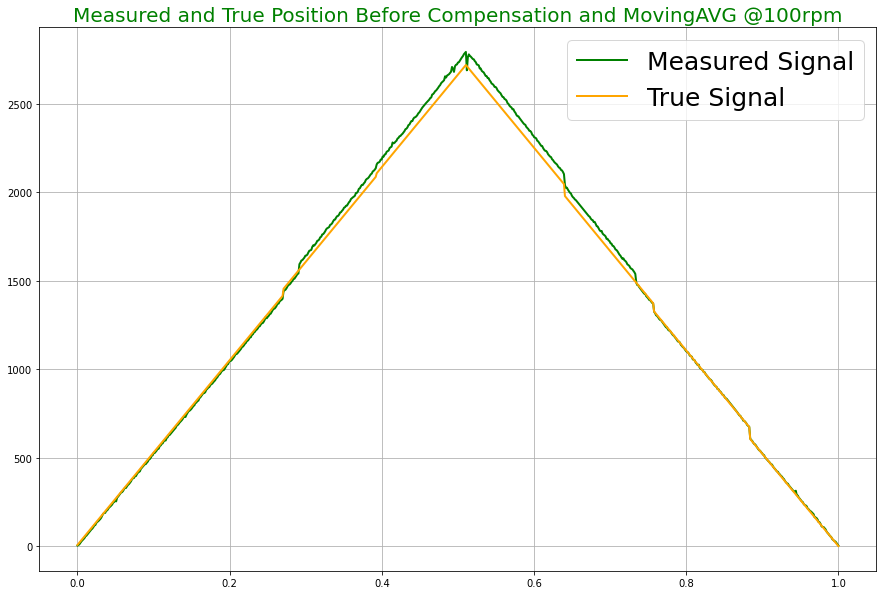

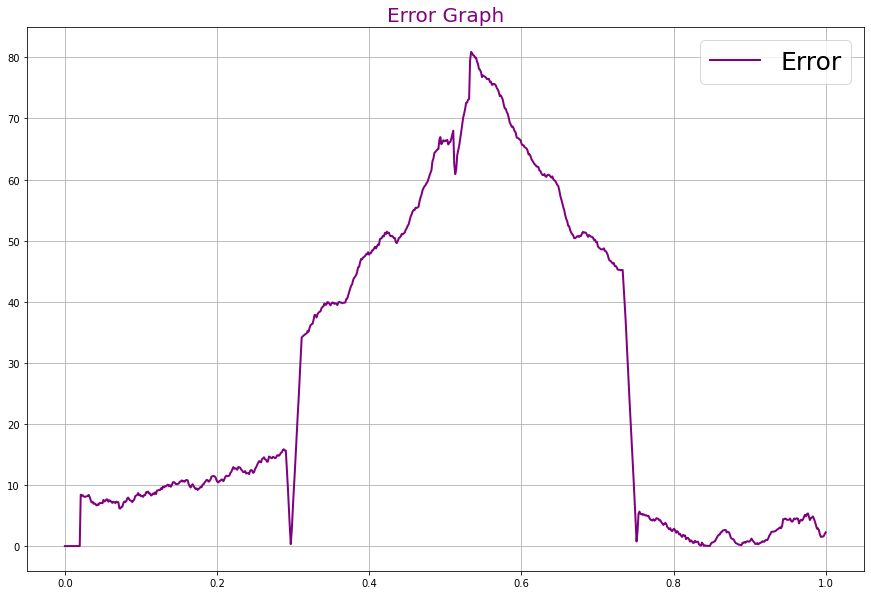

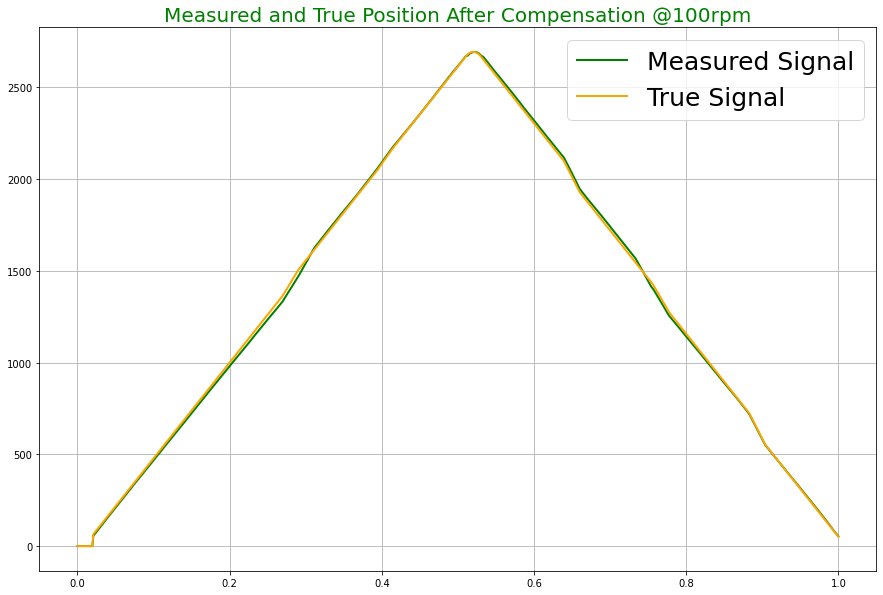

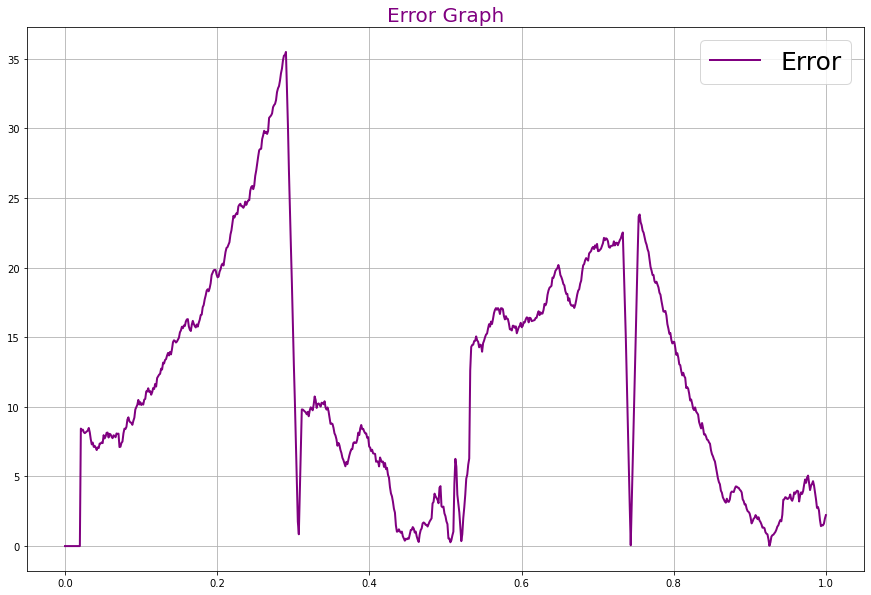

<Figure size 1080x720 with 0 Axes>

In [228]:
analog, position = ProcessAndPlot(path1, 1, 100)

Number of samples before cleaning:  752
Number of samples after cleaning:  749
The average error is:  49.46994232309746  and the maximum error is:  125.26249999999936
The average error is:  11.432276574930473  and the maximum error is:  36.067591629528806


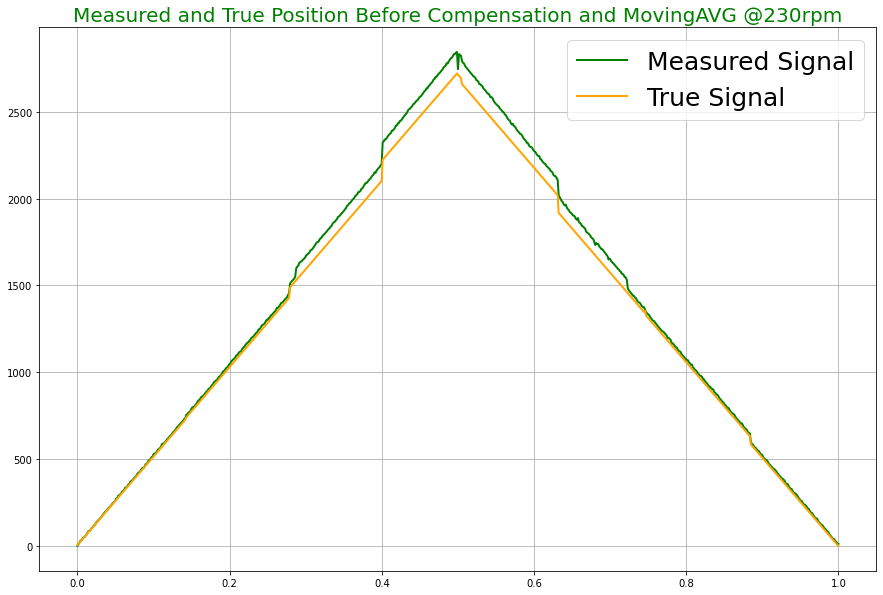

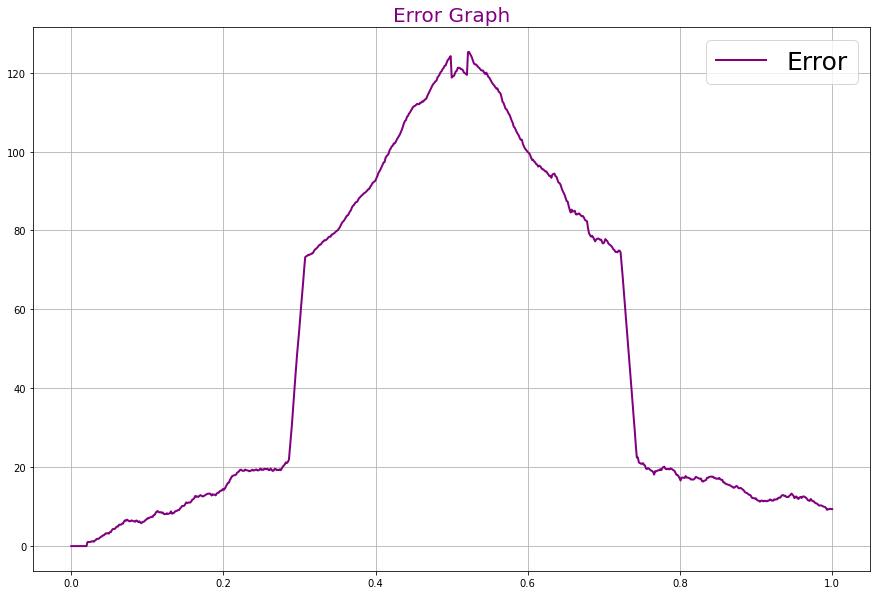

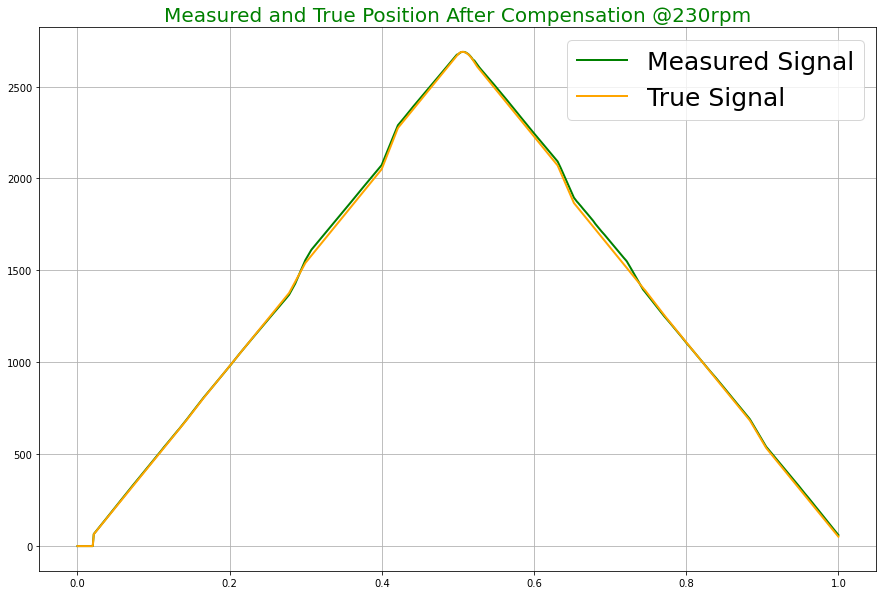

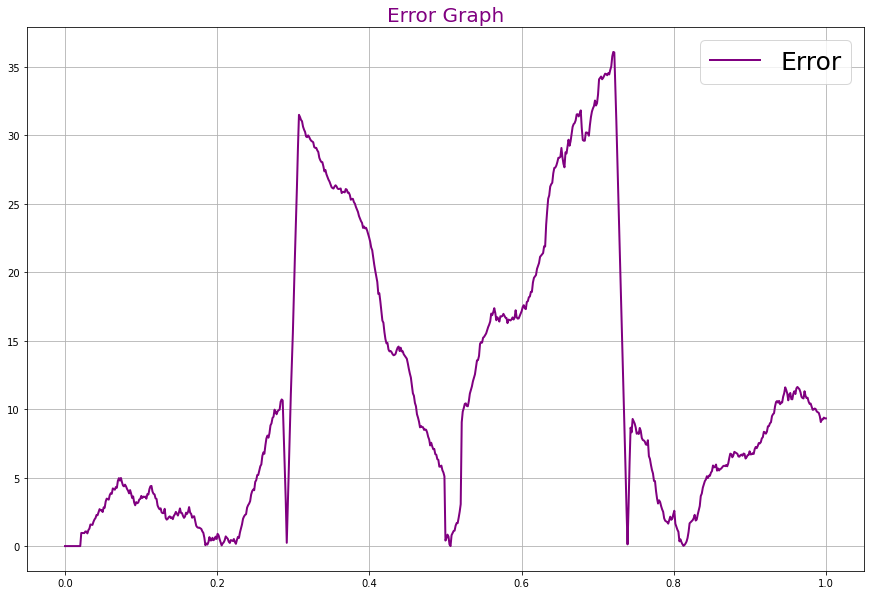

<Figure size 1080x720 with 0 Axes>

In [229]:
analog, position = ProcessAndPlot(path2, 2, 230)

Number of samples before cleaning:  1573
Number of samples after cleaning:  1563
The average error is:  146.51026596289188  and the maximum error is:  265.9875000000002
The average error is:  52.95949126646309  and the maximum error is:  80.98604086567002


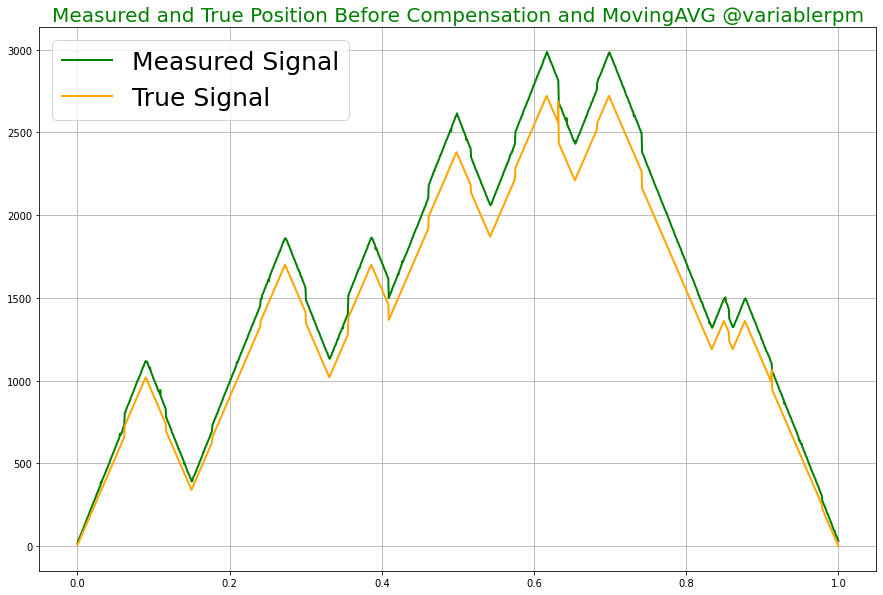

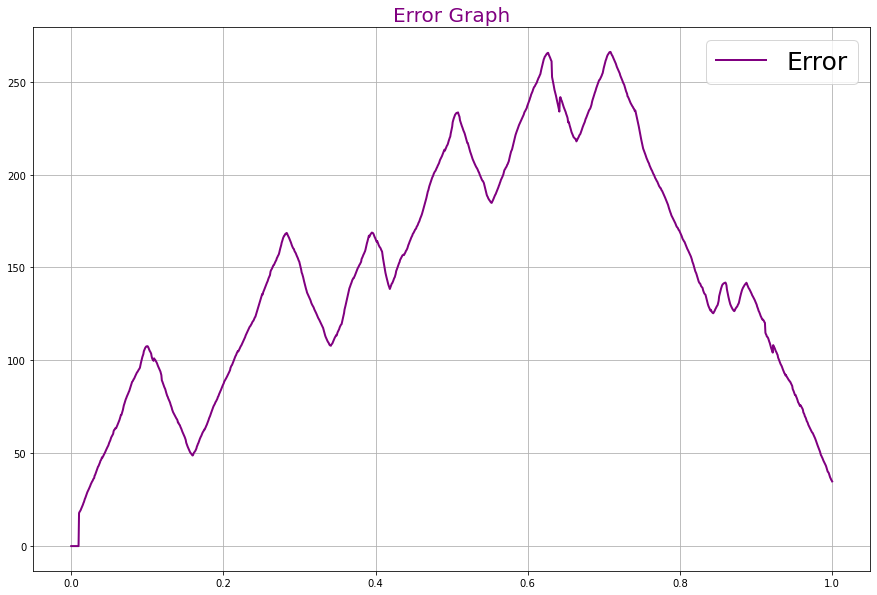

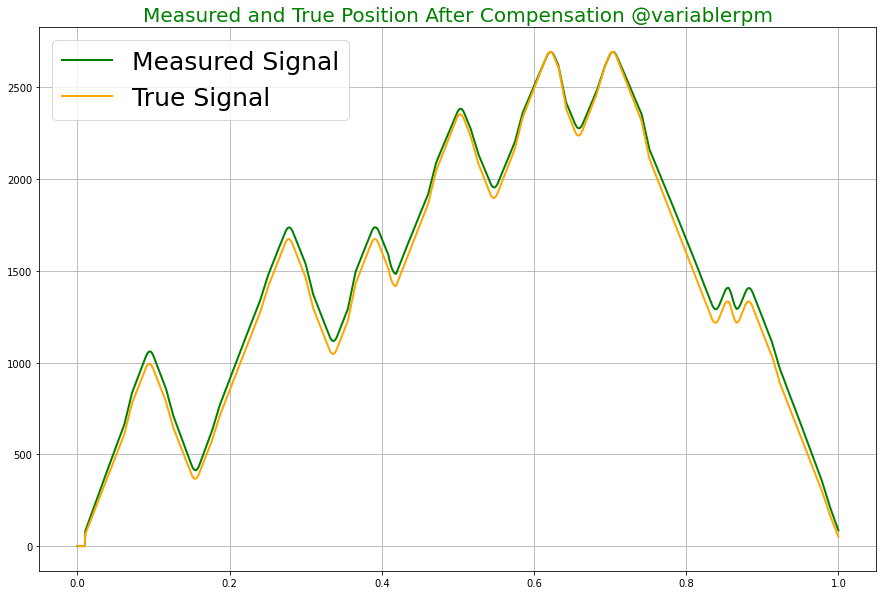

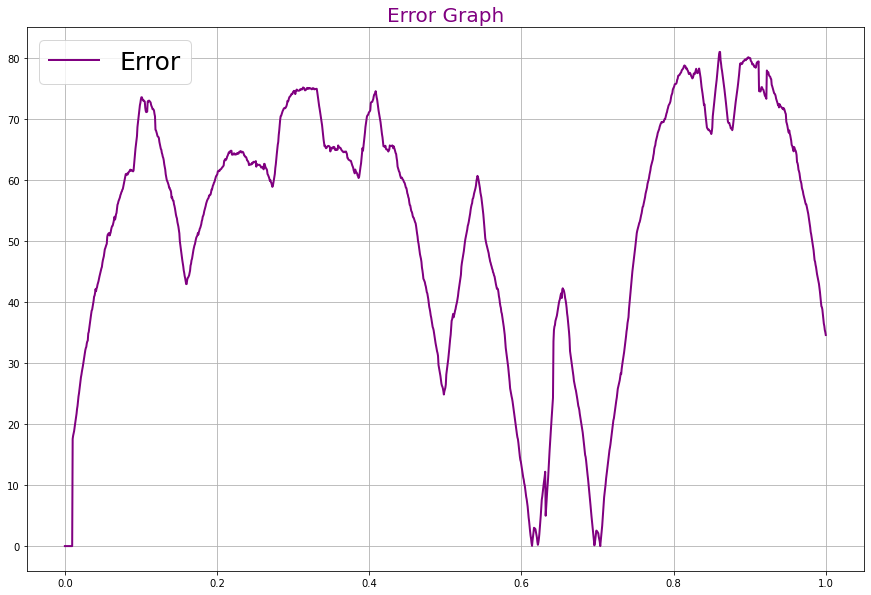

<Figure size 1080x720 with 0 Axes>

In [230]:
analog, position = ProcessAndPlot(path3, 3, 'variable')